# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [3]:
#print city list
cities

['mataura',
 'atasu',
 'esperance',
 'puerto ayora',
 'klaksvik',
 'bredasdorp',
 'south venice',
 'abu samrah',
 'yar-sale',
 'ahipara',
 'vaini',
 'port-gentil',
 'taolanaro',
 'geraldton',
 'rikitea',
 'fort nelson',
 'bluff',
 'hambantota',
 'tupelo',
 'atuona',
 'sitka',
 'sentyabrskiy',
 'calama',
 'busselton',
 'san patricio',
 'codrington',
 'shimoda',
 'punta arenas',
 'east london',
 'sinnamary',
 'fortuna',
 'khatanga',
 'albany',
 'bairiki',
 'kagoro',
 'vlasenica',
 'new norfolk',
 'tiksi',
 'ushuaia',
 'puerto escondido',
 'port elizabeth',
 'tsihombe',
 'kapaa',
 'belushya guba',
 'aksu',
 'saint-philippe',
 'palu',
 'mys shmidta',
 'marand',
 'longyearbyen',
 'leningradskiy',
 'viedma',
 'teknaf',
 'palmer',
 'harper',
 'upington',
 'aklavik',
 'dauphin',
 'nome',
 'avarua',
 'hobart',
 'saskylakh',
 'jinchang',
 'jiayuguan',
 'cherskiy',
 'grand centre',
 'carnarvon',
 'kaitangata',
 'nizhneyansk',
 'port alfred',
 'ugoofaaru',
 'bubaque',
 'molteno',
 'butaritari',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#test for response from Weather API
#url='http://api.openweathermap.org/data/2.5/weather?'

#test_city='Houston'
#test_query= f'{url}q={test_city}&appid={api_key}'
#test_results=requests.get(test_query).json()
#print(json.dumps(test_results, indent= 4)) 

In [5]:
#test for loop
#url='http://api.openweathermap.org/data/2.5/weather?'

#for city in cities:
   # query_url= f'{url}q={city}&appid={api_key}'
   # city_response=requests.get(query_url).json()
    
#print(json.dumps(city_response, indent= 4)) 

In [6]:
#identify which cities from random pull have a response from Weather API 
#url='http://api.openweathermap.org/data/2.5/weather?'
#found_cities=[]

#for city in cities:
    #query_url= f'{url}q={city}&appid={api_key}'
    
    #try:
    #lists for url and coord of each city
       # city_response=requests.get(query_url)
        #city_response.raise_for_status()
        #city_json = city_response.json()
        #found_cities.append(city)
    #except requests.exceptions.HTTPError as httperror:
       # pass 
#list of cities with results   
#print(found_cities)
        

In [7]:
# get the weather url, lat, lon coordinates of the location of your interest
#url='http://api.openweathermap.org/data/2.5/weather?'#at={lat}&lon={lon}'

#create blank lists for weather url and lat,lon 
#found_cities=[]
#weather_url=[]
#cities_lat=[]
#cities_lon=[] 
#coordinates = list(zip(cities_lat, cities_lon))

#for city in cities:
   # query_url= f'{url}q={city}&appid={api_key}'
   
    #try:
    #lists for url and coord of each city
       # city_response=requests.get(query_url)
        #city_response.raise_for_status()
        #city_json = city_response.json()
        #weather_url.append(query_url)
        #cities_lat.append(city_json['coord']['lat'])
        #cities_lon.append(city_json['coord']['lon'])
     
   # except requests.exceptions.HTTPError as httperror:
        #print(f'Request for city {city} failed with HTTP Error {httperror}') 
   # except KeyError as key_error:
       # print(f'Request for city {city} failed with Key Error {key_error}')
   # except Exception as e:
        #print(f'Request for city {city} failed with error {type(e)} {e}')
        
#print list ressults    
#print(weather_url)
#print(cities_lat)
#print(cities_lon)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#collect and create lists for city, cloudiness, country, date, humidity, lat, lng, max temp, wind speed 
#pull city, country, lat, lng from existing lists
#url='http://api.openweathermap.org/data/2.5/weather?'#at={lat}&lon={lon}'

#create blank lists for cloudiness, humidity, max temp, wind speed, country
#cloudiness_list=[]
#humidity_list=[] 
#maxtemp_list=[]
#windspeed_list=[] 
#country=[]

#serach for cities from found_cities list where there are results returned from API call
#for city in found_cities:
    #query_url= f'{url}q={city}&appid={api_key}'
   
    #try:
        #request for each city 
       # city_data=requests.get(query_url)
       # city_data.raise_for_status()
       # city2_json = city_data.json()
        #append in results lists for dataframe
      #  cloudiness_list.append(city2_json['clouds']['all'])
      #  humidity_list.append(city2_json['main']['humidity'])
      #  maxtemp_list.append(city2_json['main']['temp_max'])
      #  windspeed_list.append(city2_json['wind']['speed'])
       # country.append(city2_json['sys']['country'])
        
    #except requests.exceptions.HTTPError as httperror:
       # print(f'Request for city {city} failed with HTTP Error {httperror}')
    #except KeyError as key_error:
       #print(f'Request for city {city} failed with Key Error {key_error}')
   # except Exception as e:
       # print(f'Request for city {city} failed with error {type(e)} {e}')

#print the lists for dataframe
#print(cloudiness_list)
#print(humidity_list)
#print(maxtemp_list)
#print(windspeed_list)
#print(country)

# REVISED

In [9]:
#collect and create lists for city, cloudiness, country, date, humidity, lat, lng, max temp, wind speed 
#pull city, country, lat, lng from existing lists
url='http://api.openweathermap.org/data/2.5/weather?'#at={lat}&lon={lon}'

#create blank lists for cloudiness, humidity, max temp, wind speed, country
cloudiness_list=[]
humidity_list=[] 
maxtemp_list=[]
windspeed_list=[] 
country=[]
cities_lat=[]
cities_lon=[] 
found_cities=[]

#serach for cities from found_cities list where there are results returned from API call
for city in cities:
    query_url= f'{url}q={city}&appid={api_key}'
   
    try:
        #request for each city 
        city_data=requests.get(query_url)
        city_data.raise_for_status()
        city_json = city_data.json()
        #append in results lists for dataframe
        cloudiness_list.append(city_json['clouds']['all'])
        humidity_list.append(city_json['main']['humidity'])
        maxtemp_list.append(city_json['main']['temp_max'])
        windspeed_list.append(city_json['wind']['speed'])
        country.append(city_json['sys']['country'])
        cities_lat.append(city_json['coord']['lat'])
        cities_lon.append(city_json['coord']['lon'])
        found_cities.append(city)
        
    except requests.exceptions.HTTPError as httperror: 
        print(f'{city} was skipped')
        
    #except requests.exceptions.HTTPError as httperror:
       # print(f'Request for city {city} failed with HTTP Error {httperror}')
    #except KeyError as key_error:
      #  print(f'Request for city {city} failed with Key Error {key_error}')
    #except Exception as e:
       # print(f'Request for city {city} failed with error {type(e)} {e}')

#print the lists for dataframe
print(cloudiness_list)
print(humidity_list)
print(maxtemp_list)
print(windspeed_list)
print(country)
print(cities_lat)
print(cities_lon)
print(found_cities)

taolanaro was skipped
sentyabrskiy was skipped
bairiki was skipped
tsihombe was skipped
belushya guba was skipped
mys shmidta was skipped
grand centre was skipped
nizhneyansk was skipped
khonuu was skipped
halalo was skipped
karakendzha was skipped
kyle of lochalsh was skipped
illoqqortoormiut was skipped
asht was skipped
yunjinghong was skipped
barentsburg was skipped
amderma was skipped
rolim de moura was skipped
ust-kamchatsk was skipped
vaitupu was skipped
sodertalje was skipped
attawapiskat was skipped
umzimvubu was skipped
dzhusaly was skipped
ngukurr was skipped
bengkulu was skipped
kismayo was skipped
akyab was skipped
alotau was skipped
kamenskoye was skipped
sakakah was skipped
grand river south east was skipped
qui nhon was skipped
sogdiondon was skipped
nguiu was skipped
marcona was skipped
utiroa was skipped
wahran was skipped
port-de-paix was skipped
louisbourg was skipped
artyk was skipped
wau was skipped
tumannyy was skipped
rungata was skipped
samusu was skipped
tabiau

In [11]:
#check lengths of each list for results_df
len(found_cities)

535

In [12]:
#check lengths of each list for results_df
len(cities_lat)

535

In [13]:
#check lengths of each list for results_df
len(cities_lon)

535

In [14]:
#check lengths of each list for results_df
len(cloudiness_list)

535

In [15]:
#check lengths of each list for results_df
len(humidity_list)

535

In [16]:
#check lengths of each list for results_df
len(maxtemp_list)

535

In [17]:
#check lengths of each list for results_df
len(windspeed_list)

535

In [18]:
#check lengths of each list for results_df
len(country)

535

In [19]:
#check lengths of each list for results_df
len(cities_lat)

535

In [20]:
#check lengths of each list for results_df
len(cities_lon)

535

In [21]:
#reuslts into dataframe
results_df= pd.DataFrame({'Cities' : found_cities,
                        'Cloudiness' : cloudiness_list,
                        'Country' : country,
                        'Humidity' : humidity_list,
                        'Lat' : cities_lat,
                        'Lng' : cities_lon,
                        'Max Temp' : maxtemp_list,
                        'Wind Speed' : windspeed_list})
results_df

,Cities,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,69,NZ,93,-46.19,168.86,282.93,0.94
1,atasu,56,KZ,45,48.68,71.64,274.74,3.60
2,esperance,0,AU,20,-33.86,121.89,304.15,6.20
3,puerto ayora,38,EC,85,-0.74,-90.35,293.52,3.98
4,klaksvik,25,FO,74,62.23,-6.59,276.15,5.70
...,...,...,...,...,...,...,...,...
530,casper,90,US,84,42.87,-106.31,273.15,3.10
531,vao,100,EE,91,59.10,26.19,282.74,5.88
532,batagay,45,RU,98,67.65,134.64,243.35,0.52
533,sur,0,OM,34,22.57,59.53,299.22,6.04


In [22]:
#convert results_df to csv file
export_csv= results_df.to_csv(r'Weather Results Dataframe.csv',index = None, header=True) 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [23]:
#using results_df, scatter plot with lat on x axis and max temp on y axis 

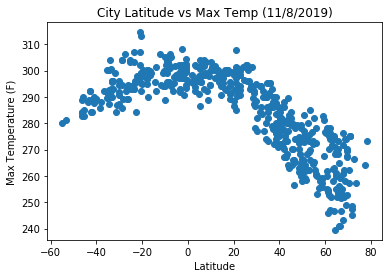

In [24]:
x_axis= results_df['Lat']
y_axis=results_df['Max Temp']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_title('City Latitude vs Max Temp (11/8/2019)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
#save the figure to png file
plt.savefig('City Latitude vs Max Temp.png')
#save the figure to png file
plt.savefig('City Latitude vs Max Temp.png')

#### Latitude vs. Humidity Plot

In [25]:
#using results_df, scatter plot with lat on x axis and humidity on y axis 

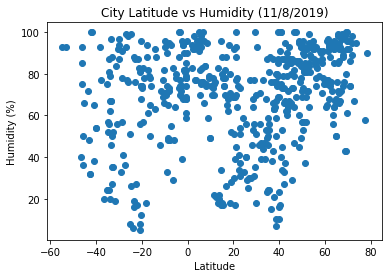

In [26]:
x_axis= results_df['Lat']
y_axis=results_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (11/8/2019)")
#save the figure to png file
plt.savefig("City Latitude vs Humidity.png")

#### Latitude vs. Cloudiness Plot

In [27]:
#using results_df, scatter plot with lat on x axis and cloudiness on y axis 

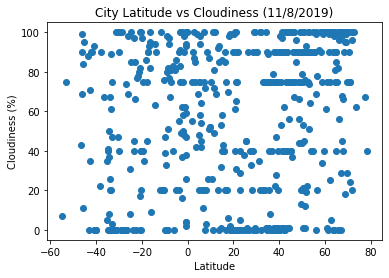

In [28]:
x_axis= results_df['Lat']
y_axis=results_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (11/8/2019)")
#save the figure to png file
plt.savefig("City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

In [29]:
#using results_df, scatter plot with lat on x axis and Wind Speed on y axis 

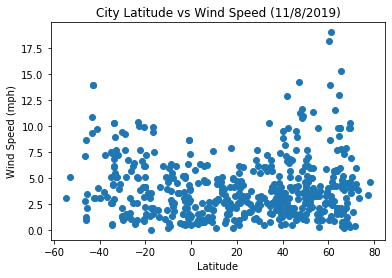

In [30]:
x_axis= results_df['Lat']
y_axis=results_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (11/8/2019)")
#save the figure to png file
plt.savefig("City Latitude vs Wind Speed.png")